In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory

In [3]:
train_data = image_dataset_from_directory(
    directory="../data/raw/train/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

test_data = image_dataset_from_directory(
    directory="../data/raw/validation/images",
    label_mode = 'categorical',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32
)

Found 1440 files belonging to 6 classes.
Found 360 files belonging to 6 classes.


In [4]:
# NORMALIZING THE IMAGES

def normalize(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_input = train_data.map(normalize)
test_input = test_data.map(normalize)


In [5]:
# Data Augmentation
augment_step = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1)
])

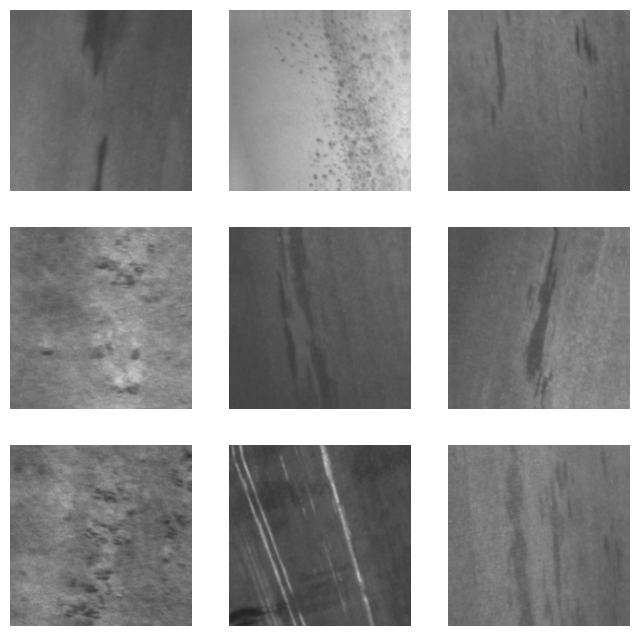

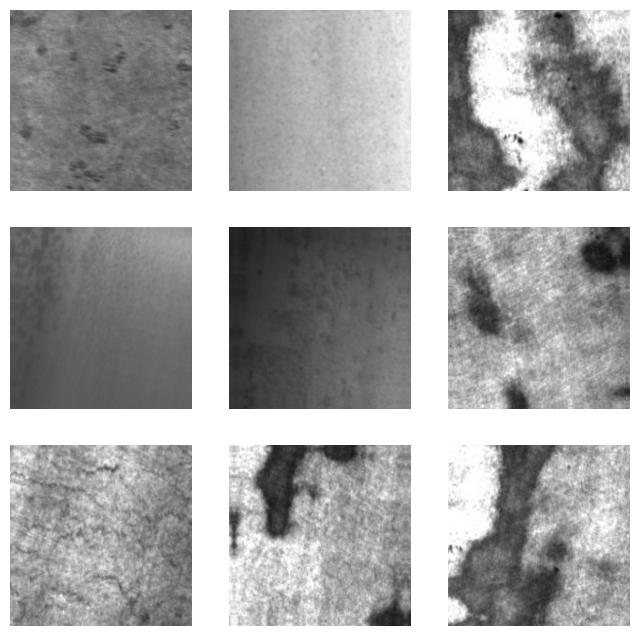

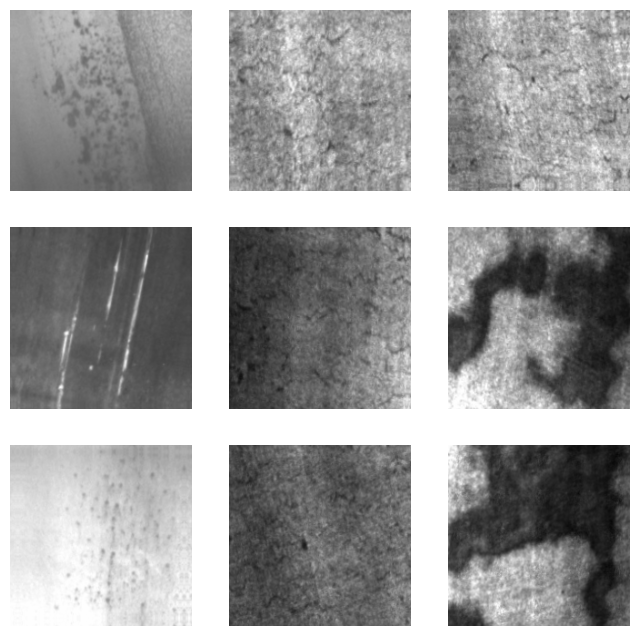

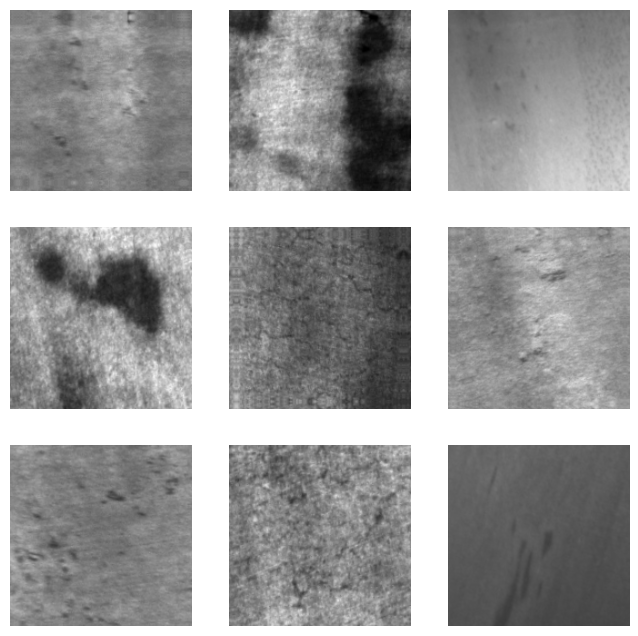

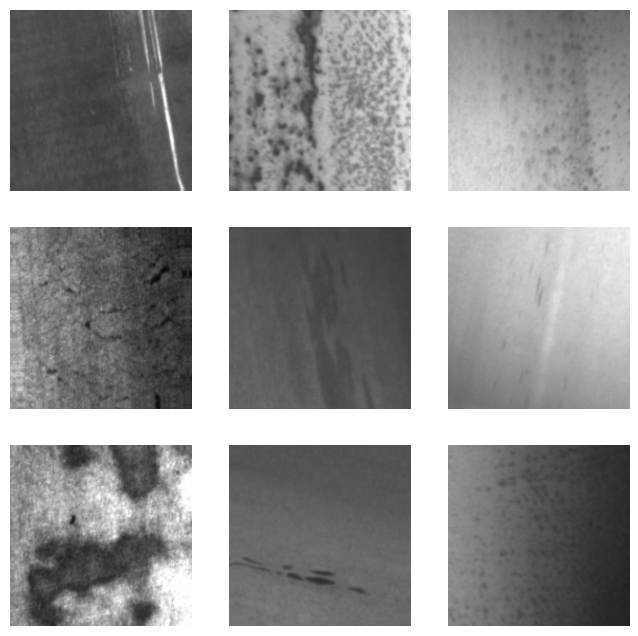

In [8]:
import matplotlib.pyplot as plt

for images, labels in train_input.take(5):
    augmented_images = augment_step(images)

    plt.figure(figsize=(8, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i])
        plt.axis("off")
    plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten

In [8]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5), strides=1, padding = 'valid', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(16,kernel_size=(5,5), strides=1, padding = 'valid', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation='tanh'))

model.add(Dense(6, activation='softmax'))


In [9]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_input, epochs = 10, validation_data=test_input)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 262ms/step - accuracy: 0.1646 - loss: 2.0894 - val_accuracy: 0.1667 - val_loss: 1.8036
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.1701 - loss: 1.8081 - val_accuracy: 0.1667 - val_loss: 1.8161
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.1771 - loss: 1.8050 - val_accuracy: 0.1667 - val_loss: 1.7976
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.1750 - loss: 1.8093 - val_accuracy: 0.1667 - val_loss: 1.8256
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.1819 - loss: 1.8057 - val_accuracy: 0.1667 - val_loss: 1.8109
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.1792 - loss: 1.8050 - val_accuracy: 0.1667 - val_loss: 1.7970
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.1632 - loss: 1.8019 - val_accuracy: 0.1667 - val_loss: 1.7960
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.1458 - loss: 1.8031 - val_accuracy: 0